train_set_norm_x / train_set_std_x: 25 lakh examples (our train split data)

val_set_norm_x / val_set_std_x: 3 lakh examples (our val split data)

test_set_norm_x / test_set_std_x: 3 lakh examples (our test split data)

mydf_test_std_x / mydf_test_std_x : 31 lakh examples (complete train_up data on kaggle)

mydf_test: 13 lakh examples (kaggle test_up data)




### Installing and importing important packages

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install sklearn
!pip install pandoc
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
import xgboost as xg
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import lightgbm as lgbm
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mydf=pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_up.csv')
mydf_test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_up.csv')

### Data Preprocessing

Data preprocessing is done to convert raw data set into the dataset that is suitable for machine learning model. It includes various steps such as encoding the categorical columns, removing/replacing null values with mean/median/mode/default values, removing duplicate rows, feature selection, etc.

Encoding categorical data into numbers using replace for the column of "Status". For categorical data to make it comparable with other data, mapping from labels to numbers is done.

## Handling Null Values



In [ ]:
mydf.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [ ]:
mydf.dropna(inplace=True)

In [ ]:
mydf_test.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [ ]:
mydf_test.dropna(inplace=True)

Null values in each column are checked and we found one null value in output variable. That corresponding row is dropped.

Dropping the columns Id, matchId as these will not have effect on the target variable. 'WinPlacePerc' is not dependent on these Ids as if a new player appears, its winning percentage is irrespective of these columns and hence, these will not help in inferring.

In [ ]:
mydf['assists'].value_counts()

0     2567059
1      414628
2       96017
3       24877
4        7060
5        1991
6         687
7         274
8         132
9          59
10         35
11         21
12         14
13          9
15          7
17          2
20          1
14          1
22          1
Name: assists, dtype: int64

In [ ]:
mydf.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3112875 entries, 0 to 3112875
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [ ]:
mydf['assists']=mydf['assists'].astype('int8')

In [ ]:
mydf.dtypes

Id                  object
groupId             object
matchId             object
assists               int8
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
matchType           object
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
dtype: object

In [ ]:
mydf['assists'].value_counts()

0     2567059
1      414628
2       96017
3       24877
4        7060
5        1991
6         687
7         274
8         132
9          59
10         35
11         21
12         14
13          9
15          7
17          2
20          1
14          1
22          1
Name: assists, dtype: int64

In [ ]:
##downcasting loop
# for col in mydf:
#  if mydf[col].dtype == 'float64':
    # mydf[col]=pd.to_numeric(mydf[col], downcast='float')
#  if mydf[col].dtype == 'int64':
    # mydf[col]=pd.to_numeric(mydf[col], downcast='integer')

In [ ]:
# for col in mydf_test:
#  if mydf_test[col].dtype == 'float64':
    # mydf_test[col]=pd.to_numeric(mydf[col], downcast='float')
#  if mydf_test[col].dtype == 'int64':
    # mydf_test[col]=pd.to_numeric(mydf[col], downcast='integer')

In [ ]:
 mydf_test.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1334090 entries, 0 to 1334089
Data columns (total 28 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1334090 non-null  object 
 1   groupId          1334090 non-null  object 
 2   matchId          1334090 non-null  object 
 3   assists          1334090 non-null  int64  
 4   boosts           1334090 non-null  int64  
 5   damageDealt      1334090 non-null  float64
 6   DBNOs            1334090 non-null  int64  
 7   headshotKills    1334090 non-null  int64  
 8   heals            1334090 non-null  int64  
 9   killPlace        1334090 non-null  int64  
 10  killPoints       1334090 non-null  int64  
 11  kills            1334090 non-null  int64  
 12  killStreaks      1334090 non-null  int64  
 13  longestKill      1334090 non-null  float64
 14  matchDuration    1334090 non-null  int64  
 15  matchType        1334090 non-null  object 
 16  maxPlace         1

In [ ]:
mydf['killPlace'].tolist()

[47,
 58,
 62,
 50,
 37,
 68,
 86,
 36,
 77,
 2,
 25,
 97,
 53,
 92,
 14,
 9,
 90,
 58,
 80,
 29,
 17,
 21,
 38,
 33,
 96,
 82,
 27,
 92,
 51,
 94,
 9,
 82,
 64,
 48,
 97,
 44,
 14,
 18,
 48,
 68,
 55,
 3,
 51,
 78,
 80,
 3,
 11,
 14,
 82,
 3,
 13,
 5,
 59,
 84,
 4,
 62,
 41,
 43,
 64,
 2,
 33,
 37,
 52,
 44,
 53,
 83,
 68,
 30,
 74,
 80,
 73,
 5,
 29,
 7,
 85,
 16,
 38,
 43,
 48,
 27,
 51,
 65,
 29,
 74,
 22,
 87,
 47,
 37,
 4,
 33,
 3,
 95,
 25,
 17,
 80,
 56,
 7,
 37,
 28,
 38,
 20,
 75,
 88,
 95,
 88,
 78,
 81,
 76,
 21,
 8,
 44,
 34,
 89,
 24,
 2,
 40,
 65,
 52,
 26,
 50,
 26,
 60,
 13,
 44,
 83,
 51,
 64,
 79,
 45,
 32,
 89,
 24,
 55,
 29,
 32,
 6,
 3,
 43,
 76,
 60,
 68,
 2,
 65,
 14,
 73,
 30,
 56,
 83,
 38,
 55,
 11,
 58,
 18,
 49,
 29,
 52,
 14,
 34,
 25,
 8,
 29,
 26,
 91,
 3,
 53,
 6,
 41,
 11,
 6,
 23,
 45,
 85,
 36,
 63,
 88,
 54,
 63,
 66,
 86,
 45,
 97,
 17,
 91,
 77,
 20,
 59,
 28,
 5,
 67,
 7,
 84,
 20,
 96,
 67,
 32,
 34,
 96,
 45,
 65,
 1,
 40,
 87,
 7,
 35,
 51,
 1

In [ ]:
print(mydf.loc[:,['killPoints','rankPoints']])

         killPoints  rankPoints
0              1245           0
1              1143          -1
2              1254          -1
3                 0        1473
4              1000          -1
...             ...         ...
3112871           0        1548
3112872           0        1528
3112873           0        1495
3112874        1287          -1
3112875        1245          -1

[3112875 rows x 2 columns]


### Handling Duplicates

In [ ]:
mydf.duplicated(keep='first').sum()

0

In [ ]:
mydf=mydf.drop_duplicates()
mydf.shape

(3112875, 29)

Duplicate rows are dropped and attribute *keep=first* is kept so that only one copy of duplicate rows remain and rest all are deleted.

In [ ]:
mydf.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [ ]:
mydf_test.duplicated(keep='first').sum()

0

In [ ]:
mydf=mydf.drop_duplicates()
mydf.shape

(3112875, 29)

In [ ]:
mydf.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

###One hot Encoding

In [ ]:
 mydf.matchType.replace(['flarefpp','crashfpp','flaretpp','crashtpp'],'Others',inplace=True)
 mydf.matchType.replace(['solo','solo-fpp','normal-solo-fpp','normal-solo'],'Solo',inplace=True)
 mydf.matchType.replace(['squad','squad-fpp','normal-squad-fpp','normal-squad'],'Squad',inplace=True)
 mydf.matchType.replace(['duo','duo-fpp','normal-duo-fpp','normal-duo'],'Duo',inplace=True)

In [ ]:
 mydf_test.matchType.replace(['flarefpp','crashfpp','flaretpp','crashtpp'],'Others',inplace=True)
 mydf_test.matchType.replace(['solo','solo-fpp','normal-solo-fpp','normal-solo'],'Solo',inplace=True)
 mydf_test.matchType.replace(['squad','squad-fpp','normal-squad-fpp','normal-squad'],'Squad',inplace=True)
 mydf_test.matchType.replace(['duo','duo-fpp','normal-duo-fpp','normal-duo'],'Duo',inplace=True)

In [ ]:
mydf = pd.get_dummies(mydf, columns=["matchType"], prefix=["matchType"] )

In [ ]:
mydf_test = pd.get_dummies(mydf_test, columns=["matchType"], prefix=["matchType"] )

### Label Encoding

In [ ]:
mydf['groupId']=preprocessing.LabelEncoder().fit_transform(mydf['groupId'])
mydf_test['groupId']=preprocessing.LabelEncoder().fit_transform(mydf_test['groupId'])

In [ ]:
len(pd.unique(mydf['groupId']))

1721143

Label encoding is performed for the column 'matchType' which has categorical values. It will assign an integer, from 0 to every unique matchType present in the dataset.

## Checking correlation

In [ ]:
mydf.corr()

,groupId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,...,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_Duo,matchType_Others,matchType_Solo,matchType_Squad
groupId,1.000000,0.001353,0.000580,0.000790,0.001267,0.000486,0.000546,-0.000813,0.001695,0.000857,...,0.000816,0.001105,-0.000262,0.001570,0.001403,0.000003,-0.000194,-0.000804,-0.000273,0.000455
assists,0.001353,1.000000,0.306828,0.406636,0.300856,0.197348,0.228227,-0.289991,0.039422,0.319504,...,0.005605,0.058013,0.289820,0.243196,0.024395,0.299127,-0.018165,-0.000916,-0.128341,0.111639
boosts,0.000580,0.306828,1.000000,0.522003,0.359065,0.334056,0.536205,-0.554666,0.008779,0.501811,...,0.012849,0.087244,0.640340,0.406081,-0.007232,0.634122,-0.004797,0.002506,-0.012394,0.013323
damageDealt,0.000790,0.406636,0.522003,1.000000,0.736479,0.613103,0.343201,-0.677550,0.050472,0.888600,...,0.014807,0.081102,0.398524,0.351982,0.018299,0.440602,0.002485,-0.007767,-0.030334,0.020890
DBNOs,0.001267,0.300856,0.359065,0.736479,1.000000,0.470563,0.266217,-0.555347,0.043234,0.708194,...,0.068976,0.059913,0.284908,0.217970,0.011683,0.280256,-0.018629,-0.003168,-0.252761,0.204292
headshotKills,0.000486,0.197348,0.334056,0.613103,0.470563,1.000000,0.199668,-0.469369,0.024603,0.673502,...,0.008750,0.038745,0.250993,0.216272,0.005566,0.277494,-0.003852,-0.009045,0.016081,-0.007513
heals,0.000546,0.228227,0.536205,0.343201,0.266217,0.199668,1.000000,-0.386162,-0.002387,0.311687,...,0.035583,0.062812,0.430413,0.308689,-0.010805,0.427902,-0.008526,0.000543,-0.058786,0.051233
killPlace,-0.000813,-0.289991,-0.554666,-0.677550,-0.555347,-0.469369,-0.386162,1.000000,-0.023727,-0.730397,...,-0.037387,-0.073637,-0.590291,-0.489205,-0.002803,-0.719009,-0.002401,-0.005629,-0.002408,0.004510
killPoints,0.001695,0.039422,0.008779,0.050472,0.043234,0.024603,-0.002387,-0.023727,1.000000,0.036788,...,-0.039952,-0.009769,0.005015,-0.003733,0.983410,0.013169,-0.029627,-0.035653,-0.040596,0.060512
kills,0.000857,0.319504,0.501811,0.888600,0.708194,0.673502,0.311687,-0.730397,0.036788,1.000000,...,0.016896,0.079669,0.374850,0.334934,0.007517,0.419801,0.000543,-0.003505,0.002857,-0.002280


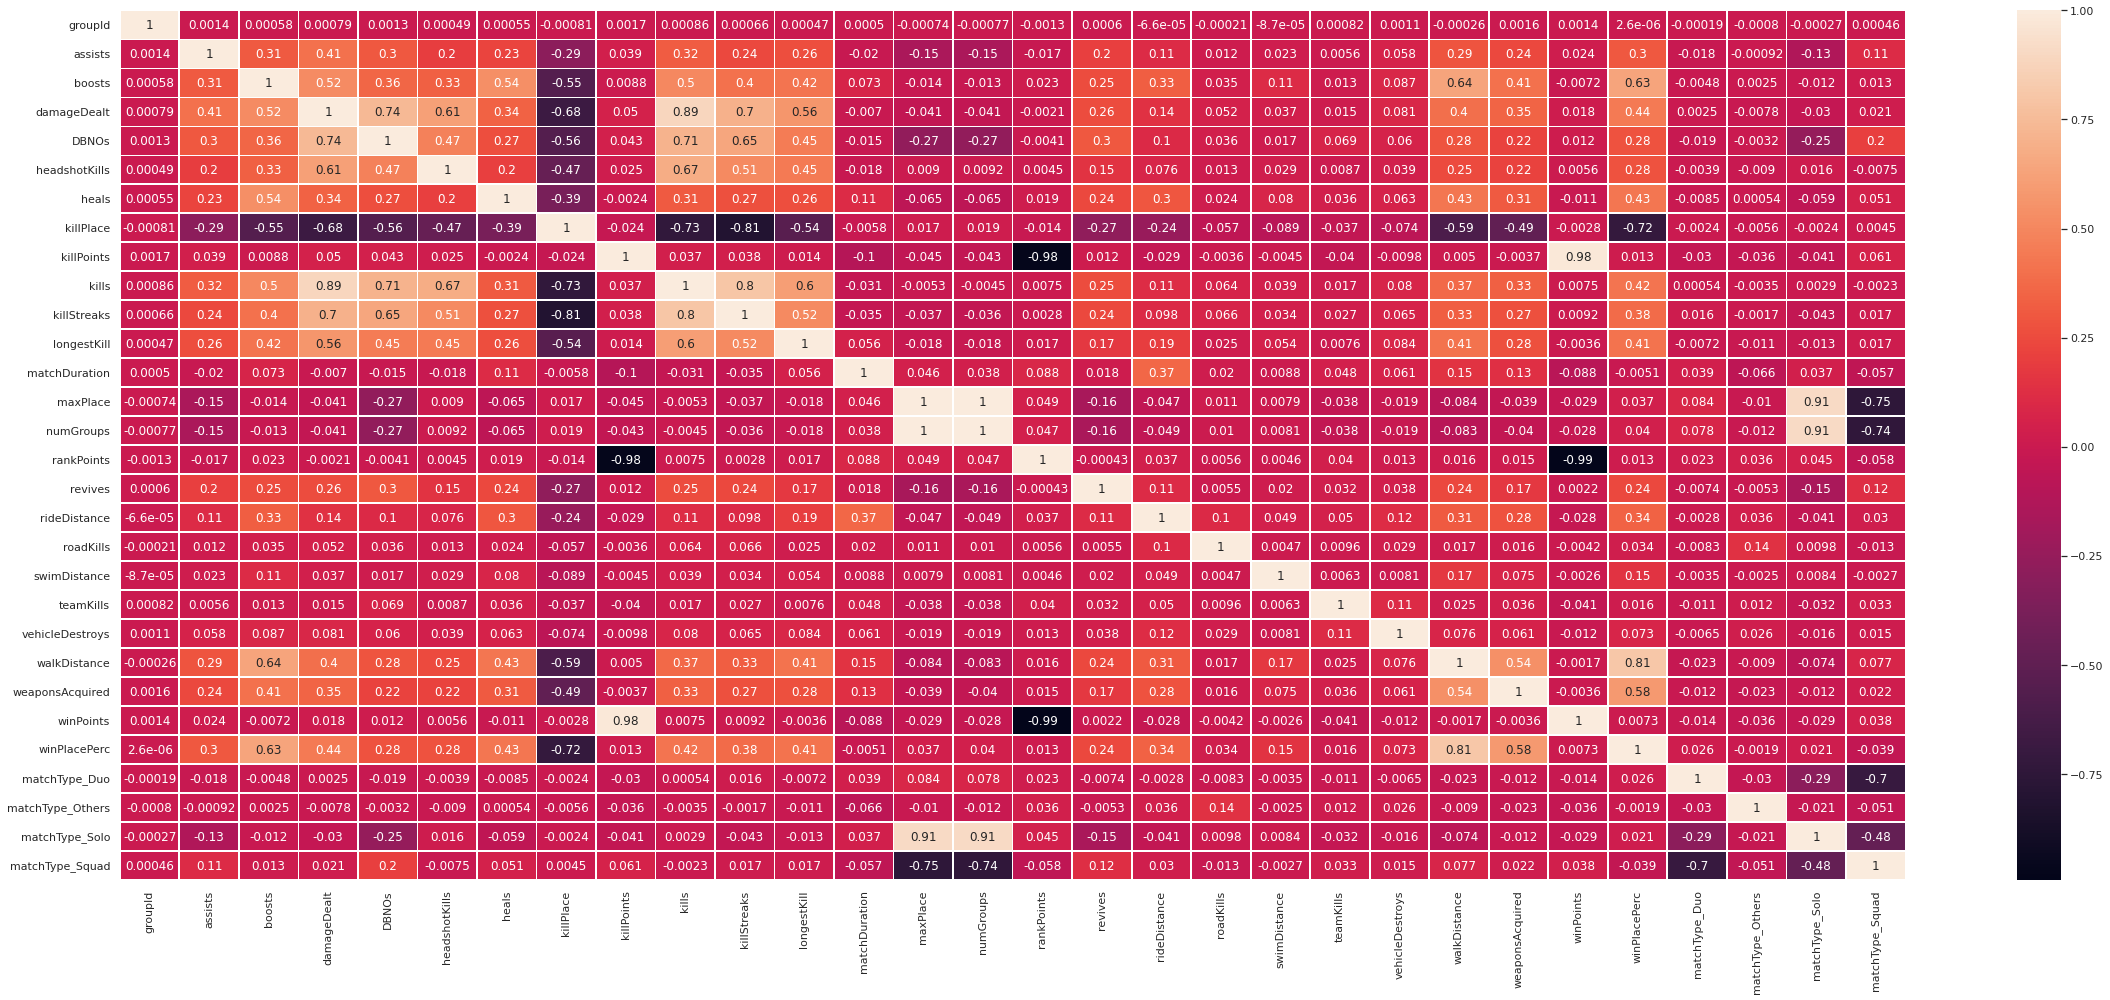

In [ ]:
sb.set(rc={'figure.figsize':(40,16)})
mn = sb.heatmap(data=mydf.corr(),linewidths=.75,annot=True)
plt.show()

In [ ]:
mydf.drop(['winPoints','killPoints','maxPlace','killStreaks'],axis=1,inplace=True)

In [ ]:
mydf_test.drop(['winPoints','killPoints','maxPlace','killStreaks'],axis=1,inplace=True)

In [ ]:
mydf.corr()['winPlacePerc']

groupId             0.000003
assists             0.299127
boosts              0.634122
damageDealt         0.440602
DBNOs               0.280256
headshotKills       0.277494
heals               0.427902
killPlace          -0.719009
kills               0.419801
longestKill         0.409986
matchDuration      -0.005130
numGroups           0.039710
rankPoints          0.013322
revives             0.241044
rideDistance        0.342521
roadKills           0.034089
swimDistance        0.149716
teamKills           0.015536
vehicleDestroys     0.073495
walkDistance        0.810922
weaponsAcquired     0.582801
winPlacePerc        1.000000
matchType_Duo       0.026043
matchType_Others   -0.001902
matchType_Solo      0.020898
matchType_Squad    -0.039125
Name: winPlacePerc, dtype: float64

Threshold set for dropping the columns when they are highly correlated is +-0.8.
Dropping columns winPoints,killPoints,maxPlace,killStreaks as
1. numGroups and maxPlace have correlation of 1.
2. killPlace and killStreaks have correlation of -0.81.
3. rankPoints and winPoints have correlation of -0.99, rankPoints and killPoints have correlation of -0.98, killPoints and winPoints have correlation of 0.98.

Therefore, among rankPoints, winPoints and killPoints, any one can be kept and rest 2 can be removed. So, the columns that have comparatively high correlation with target variable that is 'winPlacePerc' are kept rest are removed.

In [ ]:
mydf.duplicated(keep='first').sum()

0

In [ ]:
mydf=mydf.drop_duplicates()

Checking for duplicates, again and dropping, if any.

### Checking distribution visually with boxplot and histograms

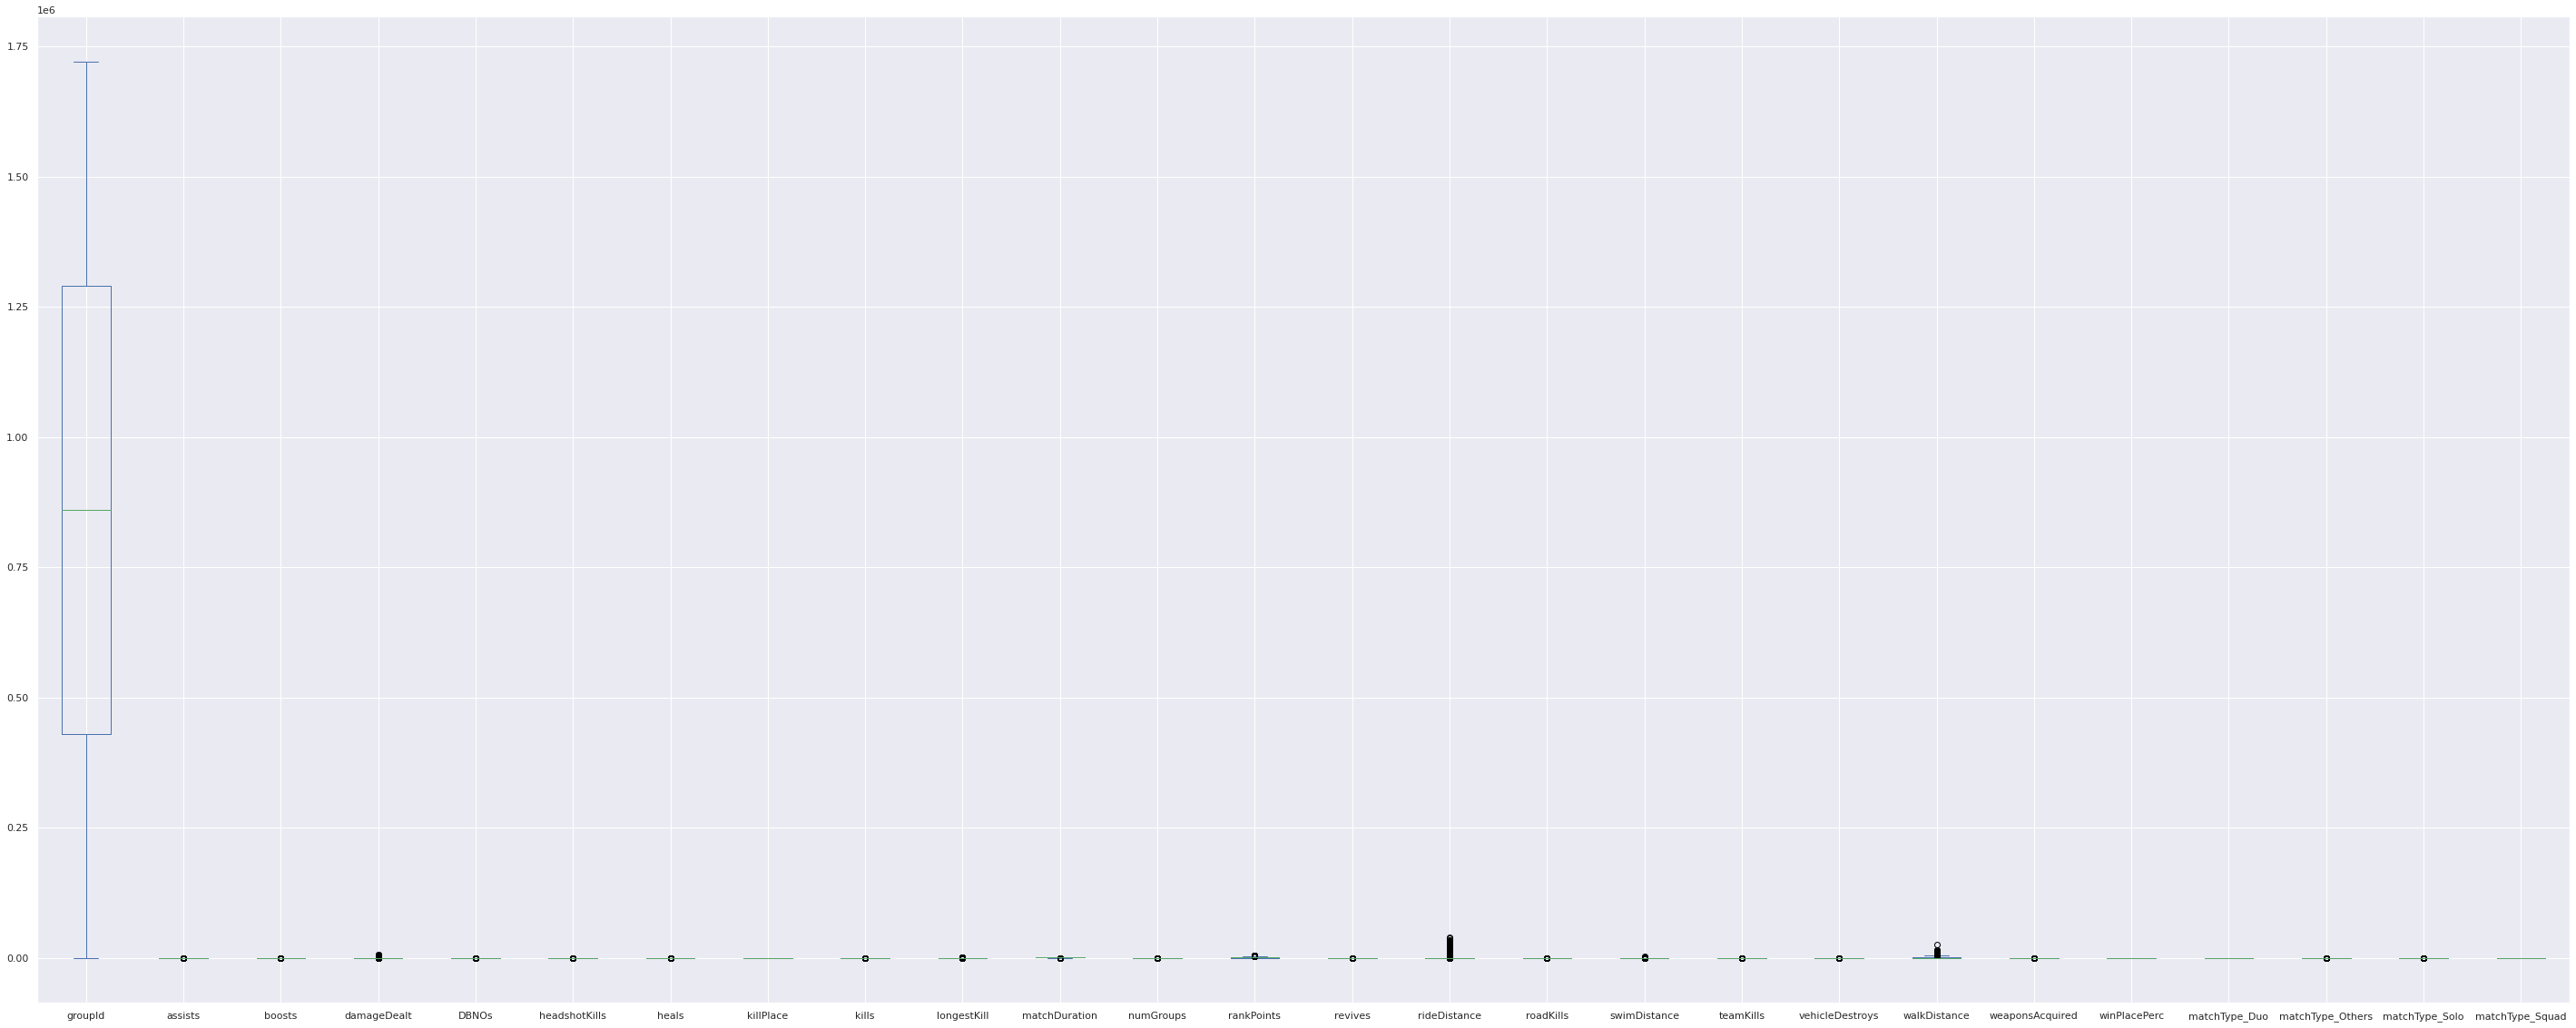

In [ ]:
mydf.plot(kind='box',figsize=(50,20));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca12d32550>,
      dtype=object)

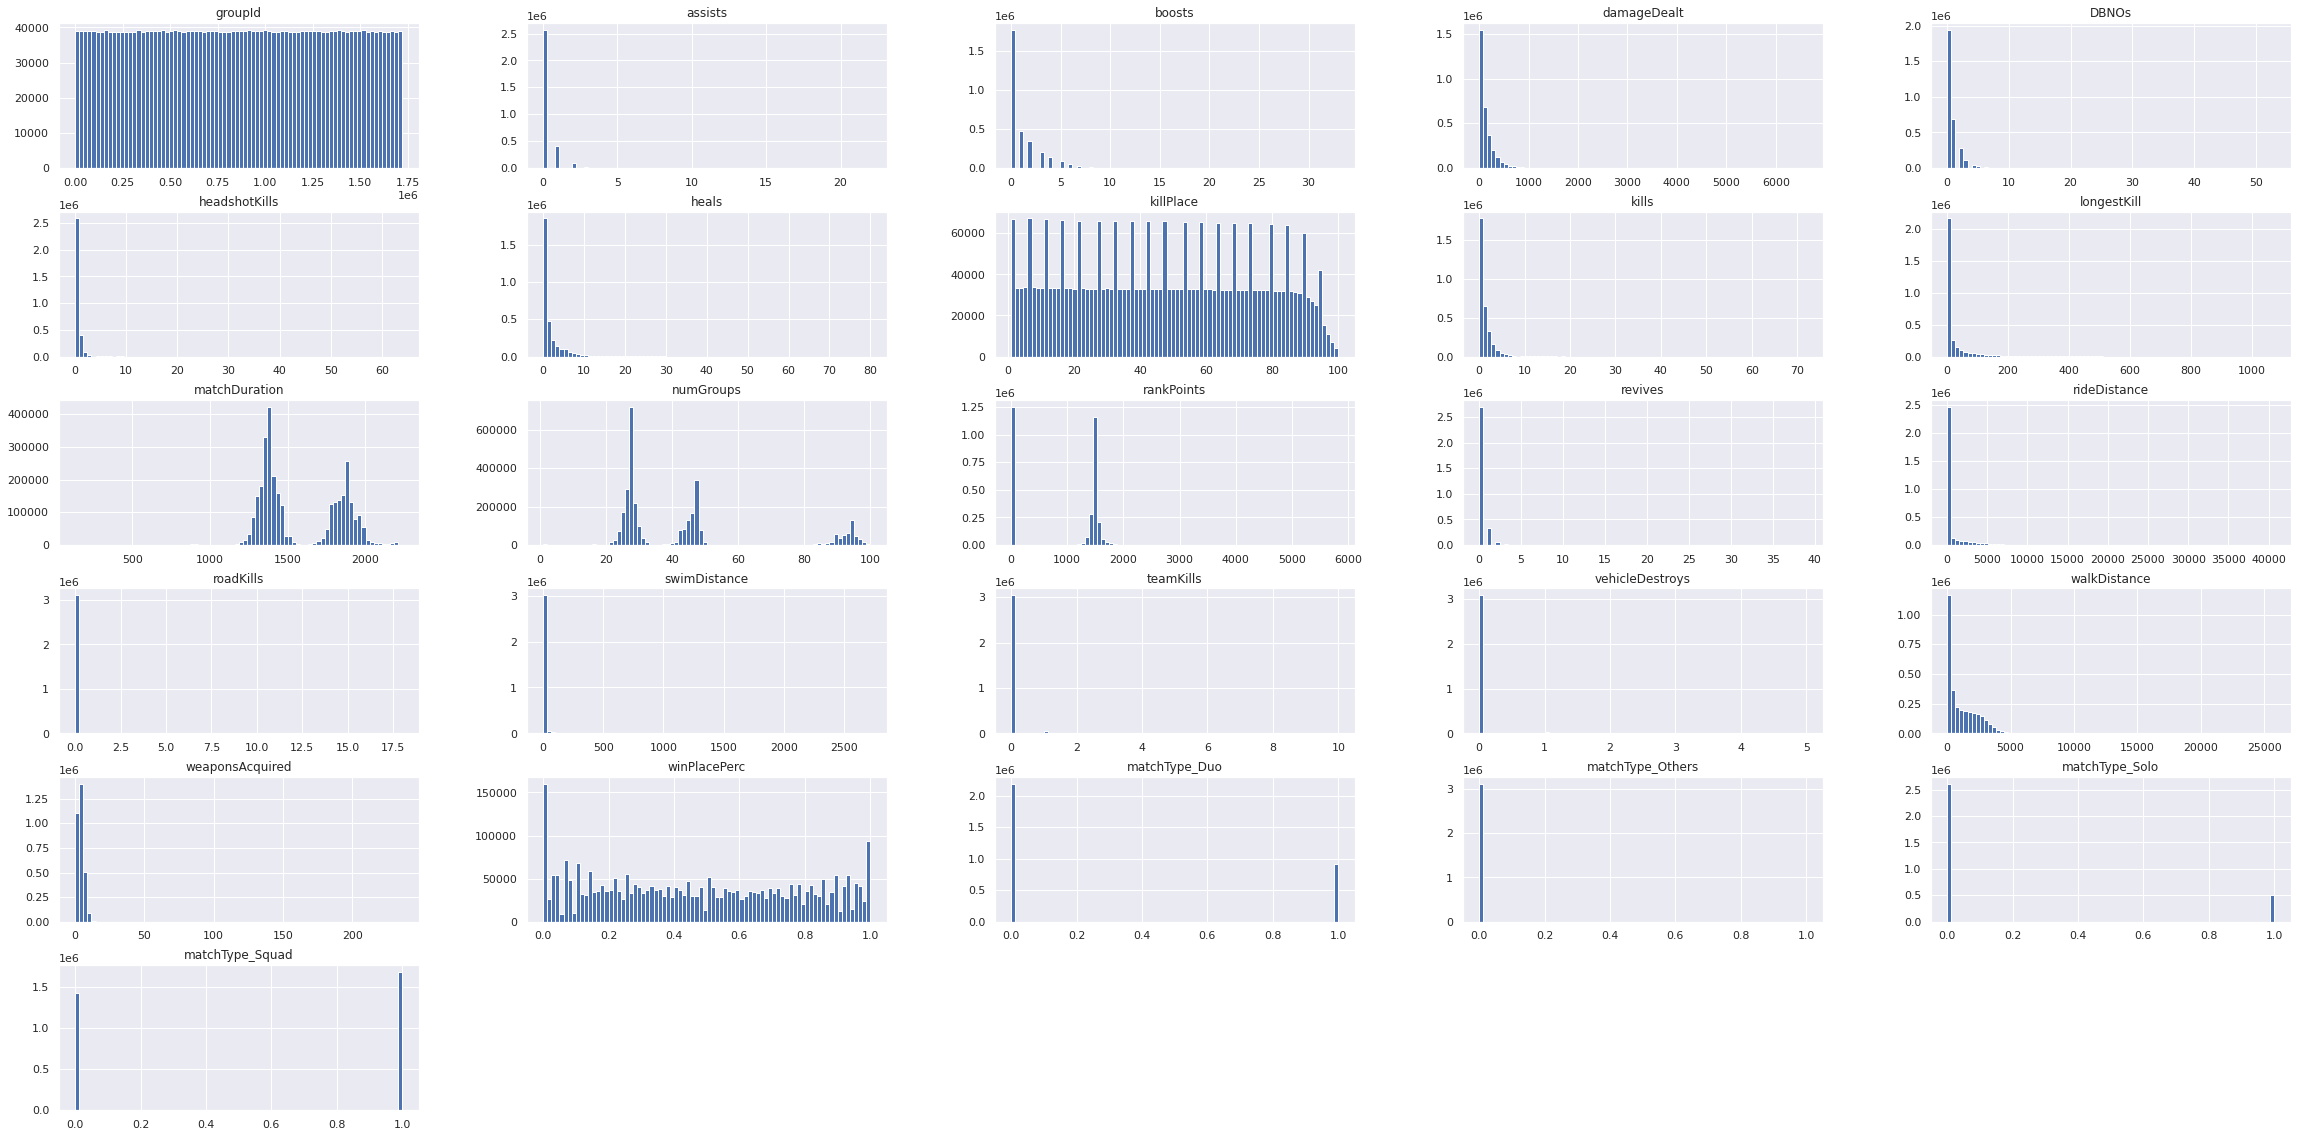

In [ ]:
mydf.hist(bins=80, figsize=(40, 20))

In [ ]:
mydf.corr()['winPlacePerc']

groupId             0.000003
assists             0.299127
boosts              0.634122
damageDealt         0.440602
DBNOs               0.280256
headshotKills       0.277494
heals               0.427902
killPlace          -0.719009
kills               0.419801
longestKill         0.409986
matchDuration      -0.005130
numGroups           0.039710
rankPoints          0.013322
revives             0.241044
rideDistance        0.342521
roadKills           0.034089
swimDistance        0.149716
teamKills           0.015536
vehicleDestroys     0.073495
walkDistance        0.810922
weaponsAcquired     0.582801
winPlacePerc        1.000000
matchType_Duo       0.026043
matchType_Others   -0.001902
matchType_Solo      0.020898
matchType_Squad    -0.039125
Name: winPlacePerc, dtype: float64

In [ ]:
mydf[['damageDealt','rideDistance','walkDistance']].describe()

,damageDealt,rideDistance,walkDistance
count,3.112875e+06,3.112875e+06,3.112875e+06
mean,1.308018e+02,6.069333e+02,1.154896e+03
std,1.707582e+02,1.500460e+03,1.183496e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.553000e+02
50%,8.435000e+01,0.000000e+00,6.867000e+02
75%,1.862000e+02,3.818500e-01,1.978000e+03
max,6.616000e+03,4.071000e+04,2.578000e+04



### Removing outliers

In [ ]:
mydf=mydf[mydf['damageDealt']<6250]
mydf=mydf[mydf['rideDistance']<32500]
mydf=mydf[mydf['walkDistance']<15000]
mydf.shape

(3112866, 28)

Outliers are extreme values in the dataset which can affect the model learning. Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations. Therefore, we remove them.

They can be checked using boxplot & histogram. Any point in the boxplot which is very much beyong the IQR, we can safely remove it. After checking boxplots and histograms, thresholds set for removing outliers and correspondingly outliers are removed.

In [ ]:
mydf[['damageDealt','rideDistance','walkDistance']].describe()

,damageDealt,rideDistance,walkDistance
count,3.112866e+06,3.112866e+06,3.112866e+06
mean,1.307979e+02,6.068876e+02,1.154878e+03
std,1.706821e+02,1.499894e+03,1.183357e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,1.553000e+02
50%,8.435000e+01,0.000000e+00,6.867000e+02
75%,1.862000e+02,3.813750e-01,1.978000e+03
max,5.990000e+03,3.245000e+04,1.425000e+04


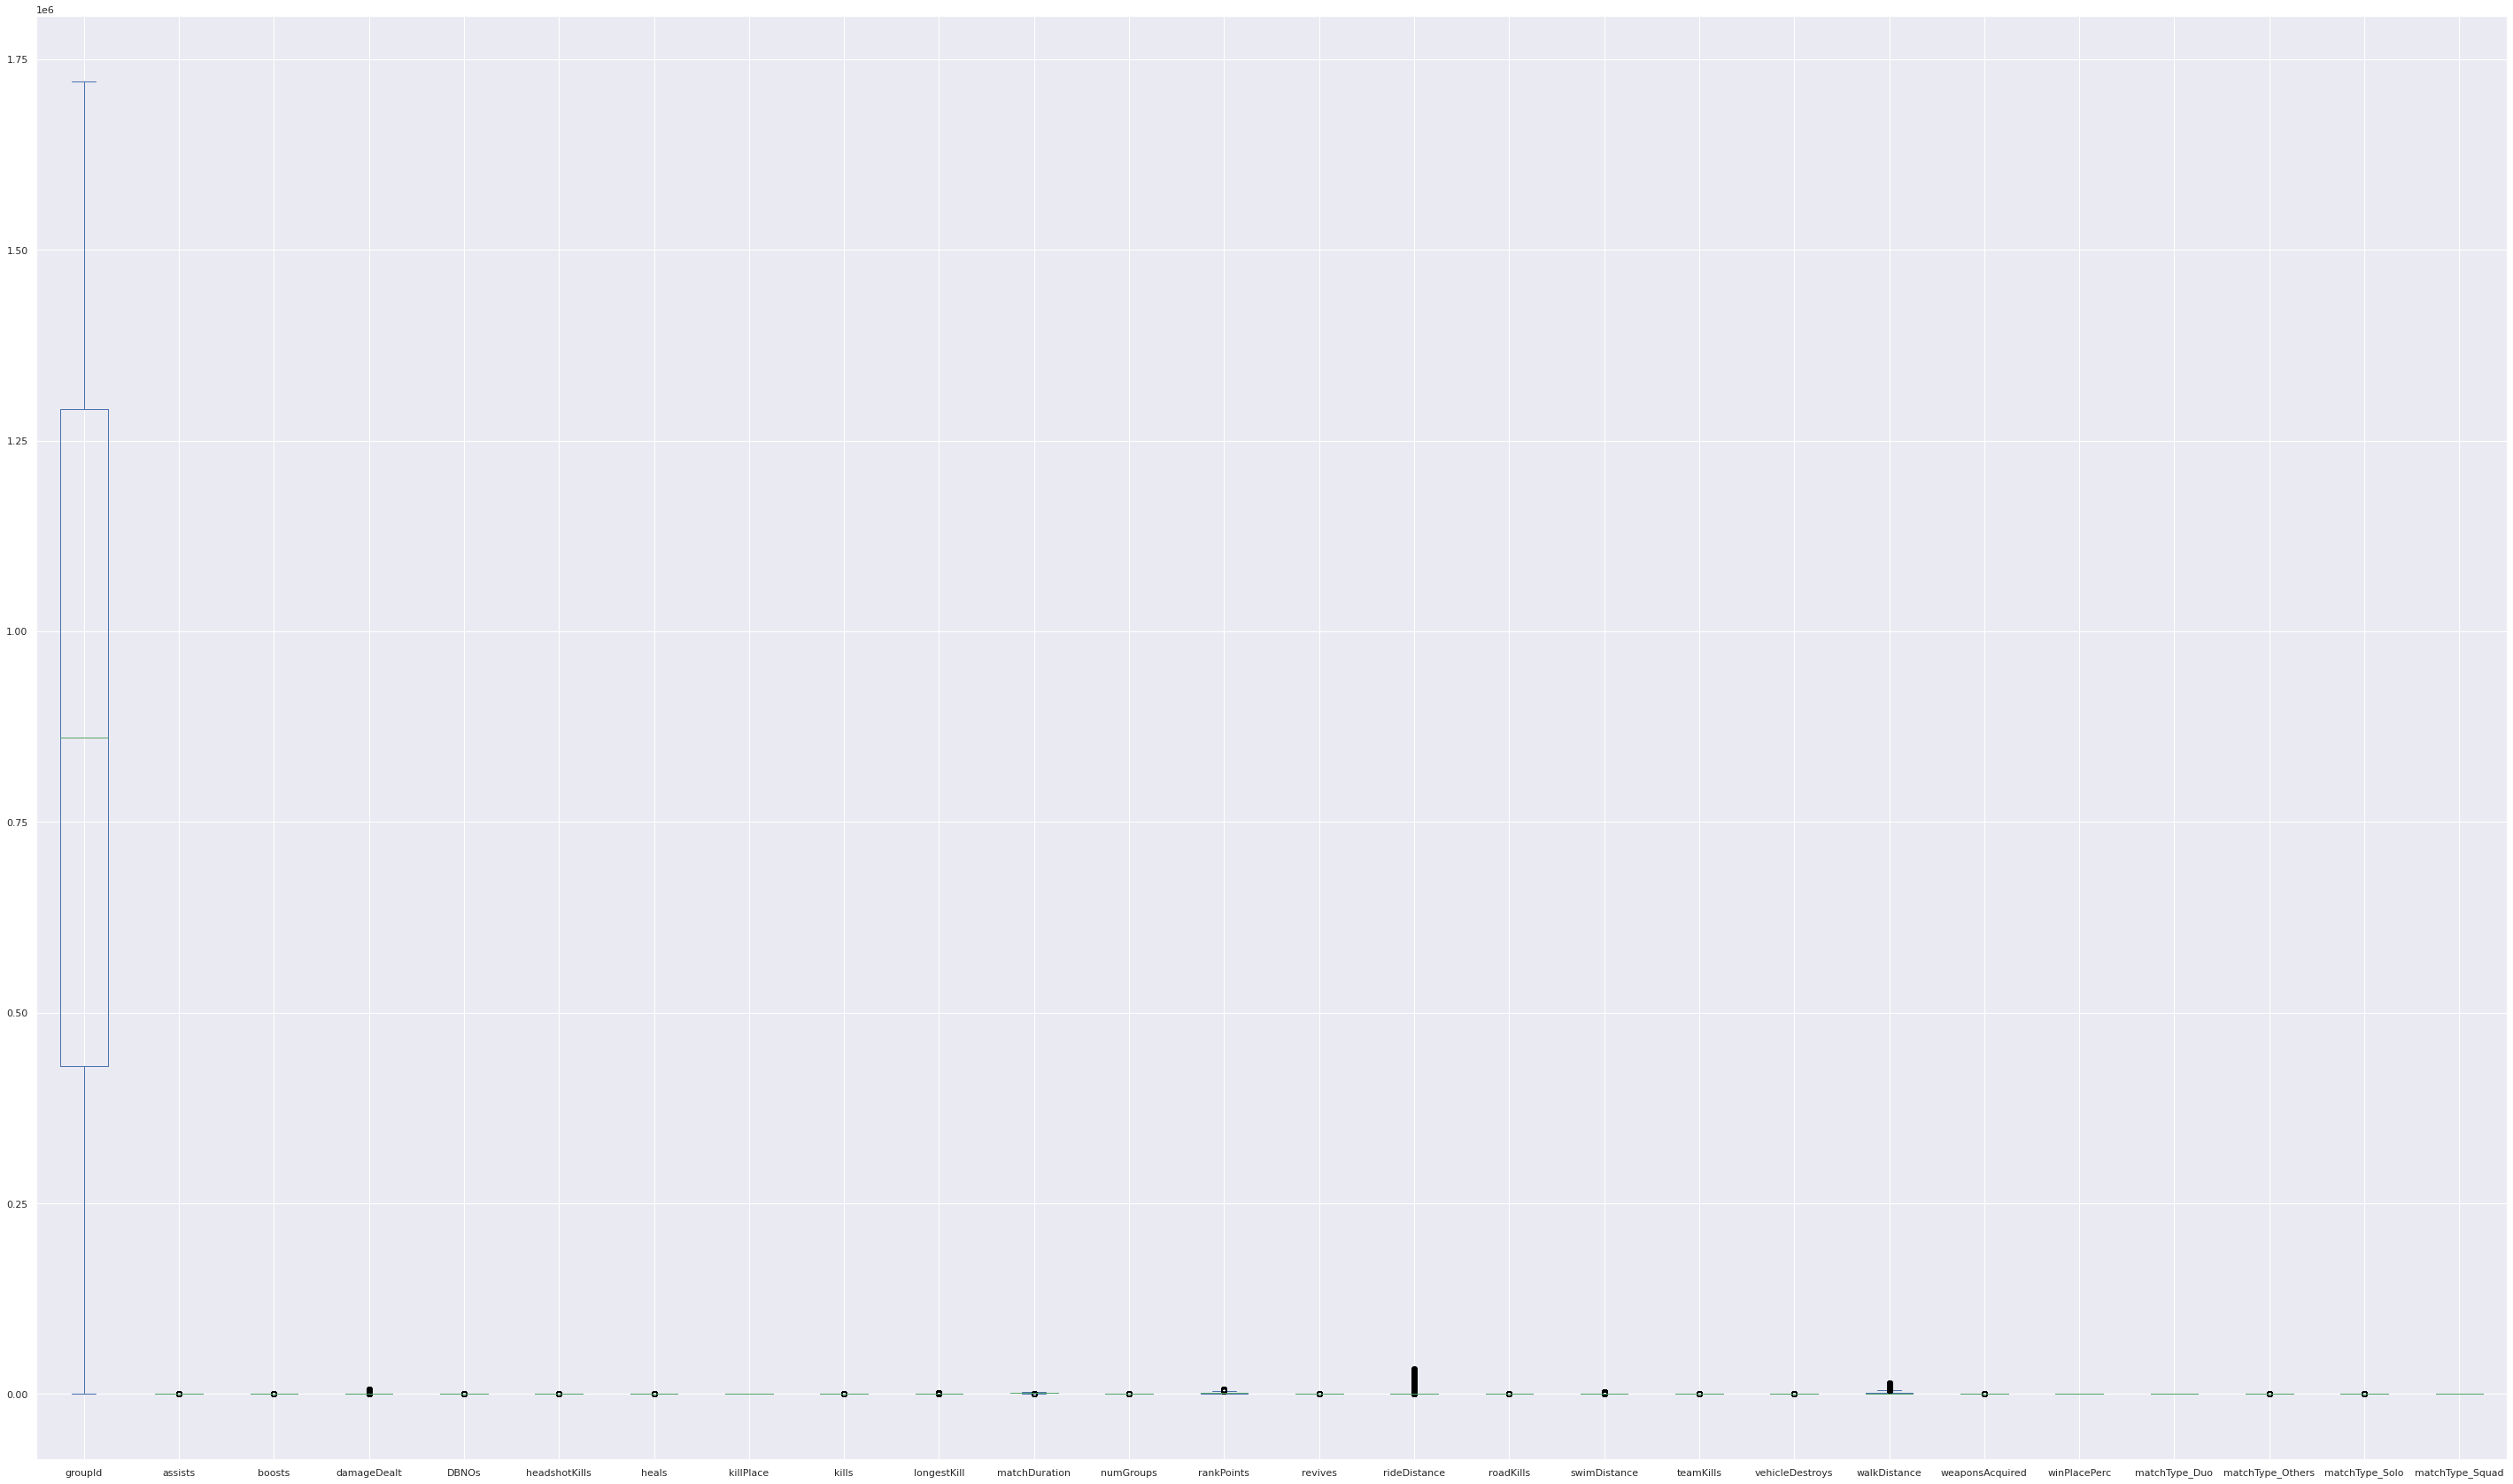

In [ ]:
mydf.plot(kind='box',figsize=(50,30));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca060f7ac0>,
      dtype=object)

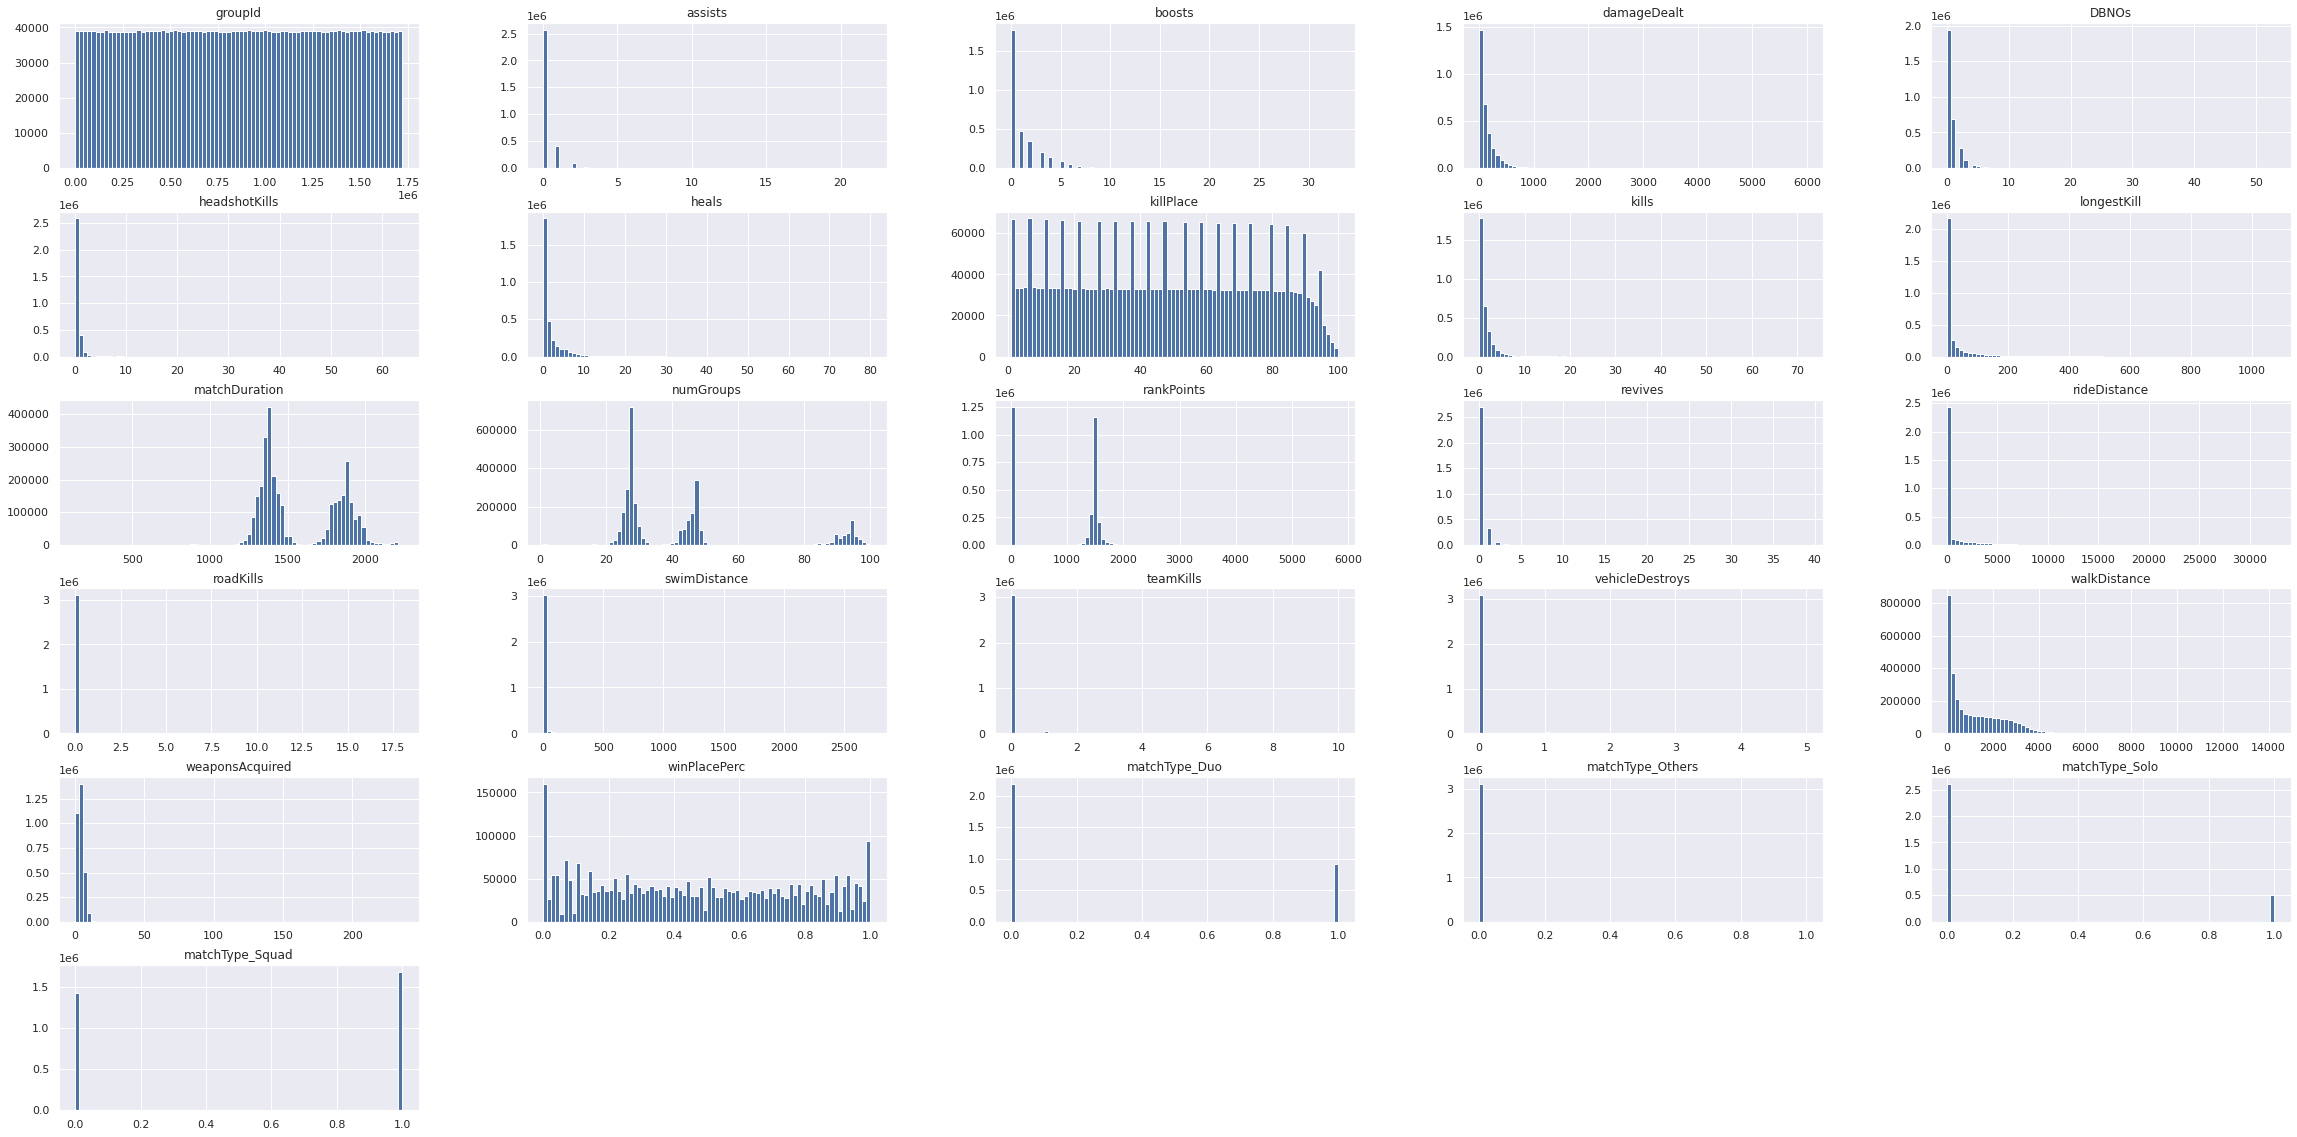

In [ ]:
mydf.hist(bins=80, figsize=(40, 20))

In [ ]:
mydf[['matchDuration','teamKills']].describe()

,matchDuration,teamKills
count,3.112866e+06,3.112866e+06
mean,1.579534e+03,2.380925e-02
std,2.587944e+02,1.672112e-01
min,1.330000e+02,0.000000e+00
25%,1.367000e+03,0.000000e+00
50%,1.438000e+03,0.000000e+00
75%,1.851000e+03,0.000000e+00
max,2.237000e+03,1.000000e+01


Checking with histogram again to remove outliers further.

In [ ]:
mydf=mydf[mydf['matchDuration']<2400]
mydf=mydf[mydf['teamKills']<5]

In [ ]:
# mydf[['matchDuration','revives','teamKills']].describe()

In [ ]:
# mydf['teamKills'].value_counts()

In [ ]:
# mydf.shape

In [ ]:
display(mydf[mydf['revives'] >= 40].shape)

(0, 28)

In [ ]:
display(mydf[mydf['rideDistance'] >= 20000].shape)

(112, 28)

In [ ]:
mydf.drop(mydf[mydf['rideDistance'] >= 20000].index, inplace=True)
mydf.shape

(3112744, 28)

In [ ]:
display(mydf[mydf['walkDistance'] >= 10000].shape)

(152, 28)

In [ ]:
mydf.drop(mydf[mydf['walkDistance'] >= 10000].index, inplace=True)
mydf.shape

(3112592, 28)

In [ ]:
display(mydf[mydf['swimDistance'] >= 2000].shape)

(8, 28)

In [ ]:
mydf.drop(mydf[mydf['swimDistance'] >= 2000].index, inplace=True)
mydf.shape

(3112584, 28)

In [ ]:
display(mydf[mydf['weaponsAcquired'] >= 80].shape)

(17, 28)

In [ ]:
mydf.drop(mydf[mydf['weaponsAcquired'] >= 80].index, inplace=True)
mydf.shape

(3112567, 28)

In [ ]:
display(mydf[mydf['heals'] >= 40].shape)

(92, 28)

In [ ]:
mydf.drop(mydf[mydf['heals'] >= 40].index, inplace=True)
mydf.shape

(3112475, 28)

###Feature Engineering (adding an additional column using other columns)

In [ ]:
mydf['totalPlayersJoined'] = mydf.groupby('matchId')['matchId'].transform('count')

mydf_test['totalPlayersJoined'] = mydf_test.groupby('matchId')['matchId'].transform('count')

In [ ]:
mydf['killsNorm'] = mydf['kills']*((100-mydf['totalPlayersJoined'])/100 + 1)
mydf['damageDealtNorm'] = mydf['damageDealt']*((100-mydf['totalPlayersJoined'])/100 + 1)

mydf_test['killsNorm'] = mydf_test['kills']*((100-mydf_test['totalPlayersJoined'])/100 + 1)
mydf_test['damageDealtNorm'] = mydf_test['damageDealt']*((100-mydf_test['totalPlayersJoined'])/100 + 1)

In [ ]:
mydf['boostsandHeals']=mydf['boosts']+mydf['heals']
mydf_test['boostsandHeals']=mydf_test['boosts']+mydf_test['heals']
mydf.shape

(3112475, 32)

In [ ]:
mydf['boostsPerWalkDistance'] = mydf['boosts']/(mydf['walkDistance']+1)
#The +1 is to avoid infinity, because there are entries where boosts>0 and walkDistance=0.
mydf['boostsPerWalkDistance'].fillna(0, inplace=True)

mydf['healsPerWalkDistance'] = mydf['heals']/(mydf['walkDistance']+1)
#The +1 is to avoid infinity, because there are entries where heals>0 and walkDistance=0.
mydf['healsPerWalkDistance'].fillna(0, inplace=True)

mydf['healsAndBoostsPerWalkDistance'] = mydf['boostsandHeals']/(mydf['walkDistance']+1)
#The +1 is to avoid infinity.
mydf['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)

In [ ]:
mydf_test['boostsPerWalkDistance'] = mydf_test['boosts']/(mydf_test['walkDistance']+1)
#The +1 is to avoid infinity, because there are entries where boosts>0 and walkDistance=0.
mydf_test['boostsPerWalkDistance'].fillna(0, inplace=True)

mydf_test['healsPerWalkDistance'] = mydf_test['heals']/(mydf_test['walkDistance']+1)
#The +1 is to avoid infinity, because there are entries where heals>0 and walkDistance=0.
mydf_test['healsPerWalkDistance'].fillna(0, inplace=True)

mydf_test['healsAndBoostsPerWalkDistance'] = mydf_test['boostsandHeals']/(mydf_test['walkDistance']+1)
#The +1 is to avoid infinity.
mydf_test['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)

In [ ]:
mydf['totalDistance']=mydf['rideDistance']+mydf['walkDistance']+mydf['swimDistance']
mydf.shape

(3112475, 36)

In [ ]:
epsilon=1e-5
mydf['headshotRate']=mydf['headshotKills']/(mydf['kills'] + epsilon)
display(mydf[mydf['headshotRate'] >= 0.99999].shape)

mydf_test['headshotRate']=mydf_test['headshotKills']/(mydf_test['kills'] + epsilon)
display(mydf_test[mydf_test['headshotRate'] >= 0.99999].shape)

(178006, 37)

(76046, 35)

In [ ]:
display(mydf[(mydf['weaponsAcquired'] != 0) & (mydf['totalDistance'] == 0)].shape)

(13271, 37)

In [ ]:
index_names_1 = mydf[(mydf['weaponsAcquired'] != 0) & (mydf['totalDistance'] == 0)].index
mydf.drop(index_names_1, inplace = True)
mydf.shape

(3099204, 37)

In [ ]:
display(mydf[(mydf['kills'] != 0) & (mydf['totalDistance'] == 0)].shape)

(20, 37)

In [ ]:
index_names_2 = mydf[(mydf['kills'] != 0) & (mydf['totalDistance'] == 0)].index
mydf.drop(index_names_2, inplace = True)
mydf.shape

(3099184, 37)

In [ ]:
mydf['killsPerWalkDistance'] = mydf['kills']/(mydf['walkDistance']+1)
#The +1 is to avoid infinity, because there are entries where kills>0 and walkDistance=0.
mydf['killsPerWalkDistance'].fillna(0, inplace=True)

In [ ]:
mydf_test['killsPerWalkDistance'] = mydf_test['kills']/(mydf_test['walkDistance']+1)
#The +1 is to avoid infinity, because there are entries where kills>0 and walkDistance=0.
mydf_test['killsPerWalkDistance'].fillna(0, inplace=True)

In [ ]:

display(mydf[(mydf['kills'] != 0) & (mydf['longestKill'] >= 1000)].shape)

(10, 38)

In [ ]:
index_names_3 = mydf[(mydf['kills'] != 0) & (mydf['longestKill'] >= 1000)].index
mydf.drop(index_names_3, inplace = True)
mydf.shape

(3099174, 38)

In [ ]:
mydf.drop(['roadKills','swimDistance'],axis=1,inplace=True)

In [ ]:
mydf_test['boostsandHeals']=mydf_test['boosts']+mydf_test['heals']
mydf_test['totalDistance']=mydf_test['rideDistance']+mydf_test['walkDistance']+mydf_test['swimDistance']
mydf_test.drop(['roadKills','swimDistance'],axis=1,inplace=True)
mydf_test.shape

(1334090, 35)

If totalDistance i.e. walkDistance, rideDistance & swimDistance, all together are 0 and still atleast 1 kill is made then this is an instance of cheating. Such cheaters are identified as outliers and they are removed.

###Fetching IDs for output CSV file

In [ ]:
y_array_std = list(mydf_test['Id'])
mydf.drop(['Id','matchId'],axis=1,inplace=True)
mydf_test.drop(['Id','matchId'],axis=1,inplace=True)

KeyError: ignored

### Standardization and Normalization

All columns are standardized so that data is comparable. Normalization maps data into the range of 0 and 1 and standardization maps the data into the range of -1 to +1
We have made functions for both, and then we are calling them from our dataframe and saving each of them separately.

In [ ]:
def standardize(mydf,col_name):
    mydf[col_name]=(mydf[col_name]-mydf[col_name].mean())/mydf[col_name].std()

def normalize(mydf,col_name):
    mydf[col_name]=(mydf[col_name]-mydf[col_name].min())/(mydf[col_name].max()-mydf[col_name].min())


In [ ]:
mydf_norm=mydf
for column in mydf_norm.columns:
    normalize(mydf_norm,column)

In [ ]:
mydf_test_norm=mydf_test
for column in mydf_test_norm.columns:
    normalize(mydf_test_norm,column)

In [ ]:

mydf_std=mydf
for column in mydf_std.columns:
    standardize(mydf_std,column)

In [ ]:

mydf_test_std=mydf_test
for column in mydf_test_std.columns:
    standardize(mydf_test_std,column)

Distribution of each of the feature is checked using distance plot to observe the skewness. Extent of skewness checked and arranged in ascending order for both standardized and normalized features.

If we have have positive skewness, then it is right-skewed, else left-skewed.
Also, skewness can be analyzed:
a) skewness ∈ [-0.5, 0.5] ⇒ less-skewed
b) skewness ∈ (-1, -0.5) or (0.5,1) ⇒ moderately-skewed
c) skewness ∈ (-infinty, -1] or [1, infinity) ⇒ highly-skewed

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


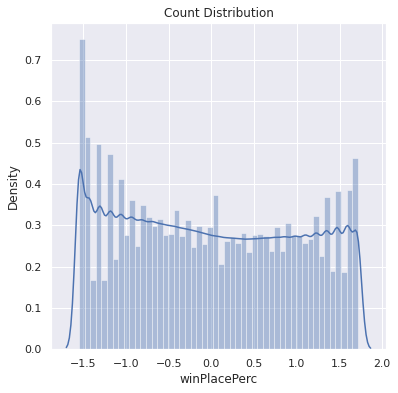

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_norm['winPlacePerc'])
plt.title('Count Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


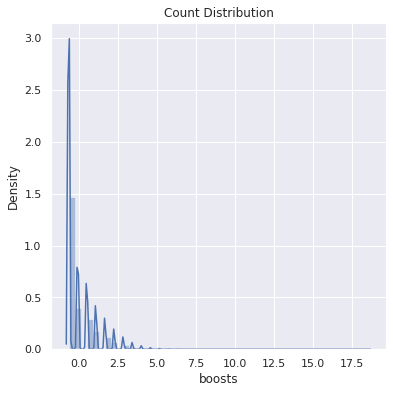

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_norm['boosts'])
plt.title('Count Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


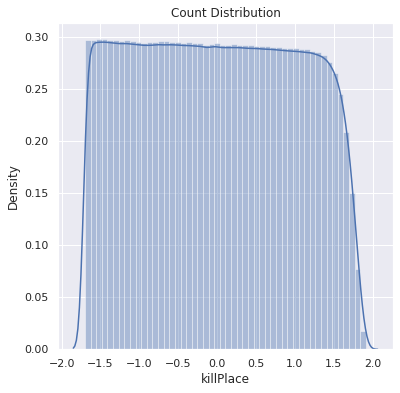

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_norm['killPlace'])
plt.title('Count Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


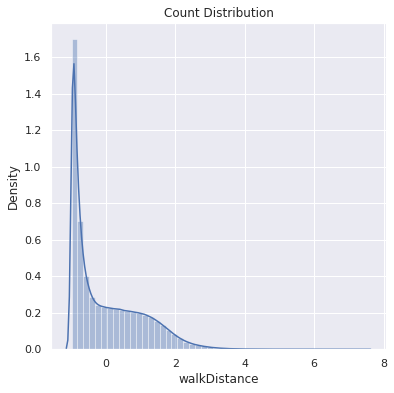

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_norm['walkDistance'])
plt.title('Count Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


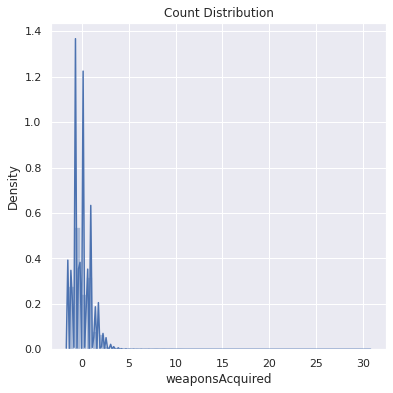

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_norm['weaponsAcquired'])
plt.title('Count Distribution')
plt.show()

In [ ]:
mydf_norm.skew().sort_values(ascending=False)

boostsPerWalkDistance            295.977153
killsPerWalkDistance             287.927730
healsPerWalkDistance             283.093376
healsAndBoostsPerWalkDistance    222.552215
matchType_Others                  21.167287
vehicleDestroys                   12.759904
teamKills                          7.991470
headshotKills                      5.313170
revives                            4.228273
killsNorm                          4.202335
longestKill                        3.908910
damageDealtNorm                    3.560092
assists                            3.519586
heals                              3.330072
kills                              3.287338
rideDistance                       3.229275
DBNOs                              3.168335
damageDealt                        2.895551
headshotRate                       2.587378
boostsandHeals                     2.310195
boosts                             1.944413
weaponsAcquired                    1.879512
matchType_Solo                  

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


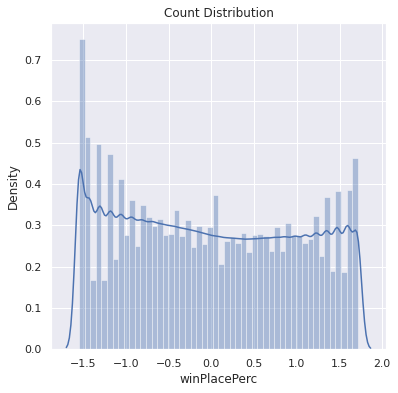

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_std['winPlacePerc'])
plt.title('Count Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


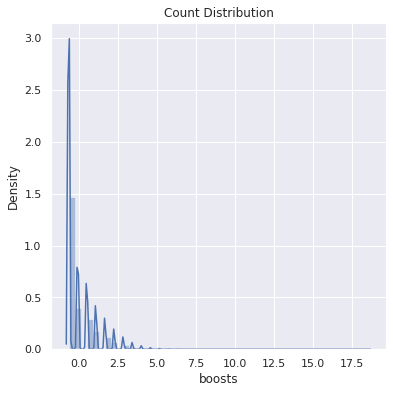

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_std['boosts'])
plt.title('Count Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


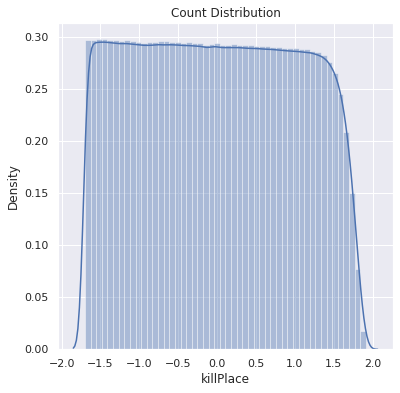

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_std['killPlace'])
plt.title('Count Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


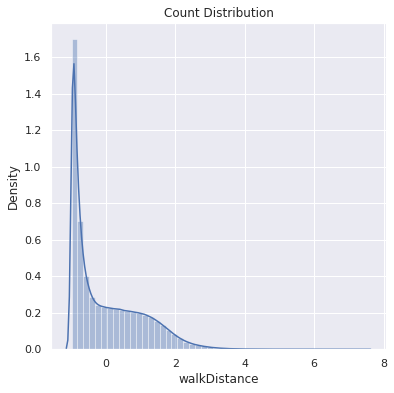

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_std['walkDistance'])
plt.title('Count Distribution')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


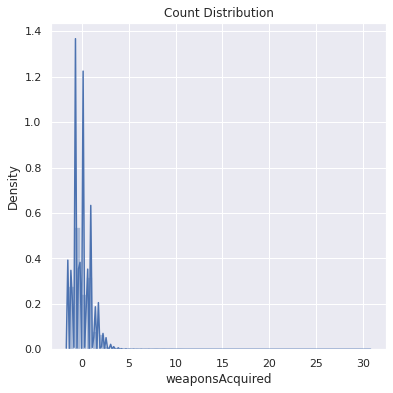

In [ ]:
plt.figure(figsize=(6,6))
sb.distplot(mydf_norm['weaponsAcquired'])
plt.title('Count Distribution')
plt.show()

In [ ]:
mydf_std.skew().sort_values(ascending=False)

boostsPerWalkDistance            295.977153
killsPerWalkDistance             287.927730
healsPerWalkDistance             283.093376
healsAndBoostsPerWalkDistance    222.552215
matchType_Others                  21.167287
vehicleDestroys                   12.759904
teamKills                          7.991470
headshotKills                      5.313170
revives                            4.228273
killsNorm                          4.202335
longestKill                        3.908910
damageDealtNorm                    3.560092
assists                            3.519586
heals                              3.330072
kills                              3.287338
rideDistance                       3.229275
DBNOs                              3.168335
damageDealt                        2.895551
headshotRate                       2.587378
boostsandHeals                     2.310195
boosts                             1.944413
weaponsAcquired                    1.879512
matchType_Solo                  

In [ ]:
mydf_norm.isnull().sum()

groupId                          0
assists                          0
boosts                           0
damageDealt                      0
DBNOs                            0
headshotKills                    0
heals                            0
killPlace                        0
kills                            0
longestKill                      0
matchDuration                    0
numGroups                        0
rankPoints                       0
revives                          0
rideDistance                     0
teamKills                        0
vehicleDestroys                  0
walkDistance                     0
weaponsAcquired                  0
winPlacePerc                     0
matchType_Duo                    0
matchType_Others                 0
matchType_Solo                   0
matchType_Squad                  0
totalPlayersJoined               0
killsNorm                        0
damageDealtNorm                  0
boostsandHeals                   0
boostsPerWalkDistanc

In [ ]:
mydf_test_norm=mydf_test_norm.sample(frac=1,random_state=11)
mydf_test_std=mydf_test_std.sample(frac=1,random_state=11)

### Splitting the data into train, validation and test set

*   Splitting data into train set which will be used by learning algorithm for training the model, validation set which can be used for hyperparameters tuning and test set which will be used by inference algorithm for predicting the values.
*   Ratio that is used for dividing Train set, Validation set and Test set is 8:1:1.
*   3109283 samples are divided into the sets of 2487426 (Train set), 310929  (Validation Set) and 310929 (Test Set).
*   Data is shuffled before splitting to avoid biasing.

In [ ]:
train_size = int(0.8 * len(mydf_norm))
test_size = int(0.1 * len(mydf_norm))
val_size = int(0.1 * len(mydf_norm))

In [ ]:
mydf_norm=mydf_norm.sample(frac=1,random_state=11)
mydf_std=mydf_std.sample(frac=1,random_state=11)

In [ ]:
mydf_std.drop(['killsPerWalkDistance','headshotRate','boostsPerWalkDistance','healsPerWalkDistance','healsAndBoostsPerWalkDistance','totalPlayersJoined','killsNorm','damageDealtNorm'],axis=1,inplace=True)

In [ ]:
mydf_test.drop(['killsPerWalkDistance','headshotRate','boostsPerWalkDistance','healsPerWalkDistance','healsAndBoostsPerWalkDistance','totalPlayersJoined','killsNorm','damageDealtNorm'],axis=1,inplace=True)

In [ ]:
mydf_test_std_x=mydf_std.drop(columns=['winPlacePerc'])
mydf_test_std_y=mydf_std['winPlacePerc']
# mydf_test_std_x.to_csv('./train_x.csv', index = False)
# mydf_test_std_y.to_csv('./train_y.csv',index=False)
# mydf_test.to_csv('./test_x.csv', index = False)
mydf_test_std_y=np.array(mydf_std['winPlacePerc'].tolist())
mydf_test_std_x=mydf_std.drop(columns=['winPlacePerc']).to_numpy()

In [ ]:
mydf_test_std_x.shape

(3099174, 25)

In [ ]:
mydf_test.shape

(1334090, 25)

In [ ]:
train_set_norm =mydf_norm[:train_size]
val_set_norm = mydf_norm[train_size:train_size+val_size]
test_set_norm=mydf_norm[train_size+val_size:]
train_set_std =mydf_std[:train_size]
val_set_std = mydf_std[train_size:train_size+val_size]
test_set_std=mydf_std[train_size+val_size:]

In [ ]:
train_set_norm_y=np.array(train_set_norm['winPlacePerc'].tolist())
train_set_norm_x=train_set_norm.drop(columns=['winPlacePerc']).to_numpy()
val_set_norm_y=np.array(val_set_norm['winPlacePerc'].tolist())
val_set_norm_x=val_set_norm.drop(columns=['winPlacePerc']).to_numpy()
test_set_norm_y=np.array(test_set_norm['winPlacePerc'].tolist())
test_set_norm_x=test_set_norm.drop(columns=['winPlacePerc']).to_numpy()

In [ ]:
train_set_std_y=np.array(train_set_std['winPlacePerc'].tolist())
train_set_std_x=train_set_std.drop(columns=['winPlacePerc']).to_numpy()
val_set_std_y=np.array(val_set_std['winPlacePerc'].tolist())
val_set_std_x=val_set_std.drop(columns=['winPlacePerc']).to_numpy()
test_set_std_y=np.array(test_set_std['winPlacePerc'].tolist())
test_set_std_x=test_set_std.drop(columns=['winPlacePerc']).to_numpy()

### Training data with Linear Regression model


FOR NORMALIZED DATASET:

LinearRegression fits a linear model with parameters W1,W2,..., Wn. Objective is to minimize the residual sum of squares between predicted values and the actual values.

In [ ]:
#LR = LinearRegression()
#LR.fit(train_set_norm_x,train_set_norm_y)

Checking the peformance of model using mean squared error. It measures error by using the average squared difference between actual and predicted values.


In [ ]:
#y_pred=LR.predict(test_set_norm_x)
#mse = np.square(np.subtract(test_set_norm_y,y_pred)).mean()
#print(mse)

FOR STANDARDIZED DATASET:

In [ ]:
#LR.fit(train_set_std_x,train_set_std_y)

Checking the peformance of model using mean squared error. It measures error by using the average squared difference between actual and predicted values.

In [ ]:
#y_pred=LR.predict(test_set_std_x)
#mse = np.square(np.subtract(test_set_std_y,y_pred)).mean()
#print(mse)

### Training with Ridge Regression



It solves a linear model where the cost function least squares function  wand regularization is L2 regularization. Data trained on ridge regression model and values predicted. Mean squared error is found as performance measure.



In [ ]:
 #model = Ridge(alpha=10)
# model.fit(train_set_std_x,train_set_std_y)

In [ ]:
#test_pred = np.array(mydf_test)

In [ ]:
 #y_pred=model.predict(test_pred)

In [ ]:
 #y_array_std=np.array(y_array_std)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./RR_submit.csv', index = False)

###Ridge regression with hyerparameter tuning :

In [ ]:
#param_grid = {'alpha': [0.01,0.1,1,5,10,20,100]}

In [ ]:
#grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,n_jobs=-1)

In [ ]:
#grid.fit(val_set_std_x,val_set_std_y)

In [ ]:
#print(grid.best_params_)

In [ ]:
#y_pred = grid.predict(test_set_std_x)

In [ ]:
#mse = np.square(np.subtract(test_set_norm_y,y_pred)).mean()
#print(mse)

In [ ]:
#y_pred=model.predict(test_pred)
##y_array_std=np.array(y_array_std)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./RR_CV_submit.csv', index = False)
#submit

### Lasso Regression:

In [ ]:
#model = Lasso(alpha=10)
#model.fit(train_set_std_x,train_set_std_y)

In [ ]:
#test_pred = np.array(mydf_test)

In [ ]:
#y_pred=model.predict(test_pred)

In [ ]:
#y_array_std=np.array(y_array_std)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./Lasso_submit.csv', index = False)

### Lasso regression with hyperparameter tuning :

In [ ]:
#param_grid = {'alpha': [0.01,0.1,1,5,10,20,100]}

In [ ]:
#grid = GridSearchCV(model, param_grid, refit = True, verbose = 3,n_jobs=-1)

In [ ]:
#grid.fit(val_set_std_x,val_set_std_y)

In [ ]:
#print(grid.best_params_)

In [ ]:
#y_pred = grid.predict(test_set_std_x)

In [ ]:
#mse = np.square(np.subtract(test_set_norm_y,y_pred)).mean()
#print(mse)

In [ ]:
#y_pred=model.predict(test_pred)
#y_array_std=np.array(y_array_std)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./Lasso_submit.csv', index = False)

### Training with XGBoost :

In [ ]:
# model_xg = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

In [ ]:
# model_xg.fit(mydf_test_std_x,mydf_test_std_y)

In [ ]:
#test_pred = np.array(mydf_test)

In [ ]:
#y_pred=model.predict(test_pred)

In [ ]:
#y_array_std=np.array(y_array_std)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./sub_22-11-4.csv', index = False)
#submit

###XGBoost with hyperparameter tuning

In [ ]:
#param_grid = {'n_estimators': [10, 50, 100, 500]}

In [ ]:
#grid = GridSearchCV(xg.XGBRegressor(), param_grid, refit = True, verbose = 3,n_jobs=1)

In [ ]:
#grid.fit(mydf_test_std_x,mydf_test_std_y)

In [ ]:
#test_pred = np.array(mydf_test)

In [ ]:
#y_pred=model.predict(test_pred)

In [ ]:
#y_array_std=np.array(y_array_std)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./sub_xg_grid.csv', index = False)
#submit

###Random forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 60, max_depth=40, random_state = 42)
rf.fit(mydf_test_std_x,mydf_test_std_y);

In [ ]:
test_pred = np.array(mydf_test)

In [ ]:
y_pred=rf.predict(test_pred)

In [ ]:
y_array_std=np.array(y_array_std)

In [ ]:
submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
normalize(submit,'winPlacePerc')
submit.to_csv('./rf_submit.csv', index = False)
submit

### Random Forest with GridSearchCV:

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
##param_grid = {'n_estimators': [10,15,20,25], 'max_depth':[10,20,40,60,50,80,83,85]}

In [ ]:
#grid = GridSearchCV(RandomForestRegressor(), param_grid, refit = True, verbose = 3,n_jobs=1)

In [ ]:
#grid.fit(mydf_test_std_x,mydf_test_std_y)

In [ ]:
#test_pred = np.array(mydf_test)

In [ ]:
#y_pred=model.predict(test_pred)

In [ ]:
#y_array_std=np.array(y_array_std)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./final.csv', index = False)
#submit

#AdaBoost model

###Without GridSearchCV

In [ ]:
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.datasets import make_regression

#mydf_test_std_x, mydf_test_std_y = make_regression(n_features=25, n_informative=2, random_state=0, shuffle=False)
#adaB = AdaBoostRegressor(random_state=1, n_estimators=15)
#adaB.fit(mydf_test_std_x, mydf_test_std_y)

In [ ]:
#test_pred = np.array(mydf_test)
#test_pred.shape

In [ ]:
#y_pred=adaB.predict(test_pred)
#print(y_pred.shape)

In [ ]:
#print(adaB.score(mydf_test_std_x, mydf_test_std_y))

In [ ]:
#mydf_test_std_y.shape

In [ ]:
#y_pred.shape

In [ ]:
#mse = np.square(np.subtract(mydf_test_std_y,y_pred)).mean()
#print(mse)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./adaboost_final.csv', index = False)
#submit

###Baseline Regression Tree model

In [ ]:
#from sklearn import tree
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold

#from sklearn.metrics import mean_squared_error

In [ ]:
#cross_validation=KFold(n_splits=10, shuffle=True, random_state=1)
#for depth in range(1, 10):
    #tree_regressor=tree.DecisionTreeRegressor(max_depth=depth, random_state=1)
    #if tree_regressor.fit(mydf_test_std_x,mydf_test_std_y).tree_.max_depth<depth:
      #break
    #score_1=np.mean(cross_val_score(tree_regressor, mydf_test_std_x, mydf_test_std_y, scoring='neg_mean_squared_error', cv=cross_validation, n_jobs=1))
    #print(depth, score_1)

In [ ]:
#adaB.score(mydf_test_std_x, mydf_test_std_y)

In [ ]:
#adaB=AdaBoostRegressor(n_estimators=10, learning_rate=0.01, random_state=1)
#score=np.mean(cross_val_score(adaB, mydf_test_std_x, mydf_test_std_y, scoring='neg_mean_squared_error', cv=cross_validation, n_jobs=1))

###Hyperparameter Tuning using GridSearchCV

In [ ]:
#adaB_gsCV=AdaBoostRegressor()
#searchGrid={'n_estimators':[10, 15, 20],'learning_rate':[0.001, 0.01, 0.1],'random_state':[1]}
#search=GridSearchCV(estimator=adaB_gsCV,param_grid=searchGrid,scoring='neg_mean_squared_error', n_jobs=1, cv=cross_validation)


In [ ]:
#search.fit(mydf_test_std_x, mydf_test_std_y)

In [ ]:
#print(search.best_params_)

In [ ]:
#print(search.best_score_)

In [ ]:
#test_pred = np.array(mydf_test)
#test_pred.shape

In [ ]:
#y_pred=search.predict(test_pred)
#print(y_pred.shape)

In [ ]:
#y_array_std=np.array(y_array_std)
#print(y_array_std.shape)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./adaboost_GSCV_final.csv', index = False)
#submit

#Training with Multilayered perceptron

In [ ]:
#mlp = MLPRegressor(hidden_layer_sizes=(150,),activation='relu',solver='sgd',alpha=0.0001,random_state=1, max_iter=300).fit(mydf_test_std_x, mydf_test_std_y)

In [ ]:
#test_pred = np.array(mydf_test)
#y_pred=mlp.predict(test_pred)
#y_array_std=np.array(y_array_std)

In [ ]:
#submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
#normalize(submit,'winPlacePerc')
#submit.to_csv('./mlp_submit.csv', index = False)
#submit

#Light GBM Model

In [ ]:
# import lightgbm as lgbm
# from sklearn.metrics import roc_auc_score

In [ ]:
# train_data=lgbm.Dataset(mydf_test_std_x, label=mydf_test_std_y)
# parameters={
              # 'max_depth':16,
              # 'objective':'regression',
              # 'metric':'mean_squared_error',
              # 'boosting':'rf',
              # 'min_data_in_leaf':500,
              # 'num_leaves':65536,
              # 'feature_fraction':1,
              # 'bagging_fraction':0.99,
              # 'bagging_freq':10,
              # 'learning_rate':0.003,
              # 'verbose':-1
# }

In [ ]:
# lgb_model = lgbm.train(parameters, train_data, num_boost_round=2000)

In [ ]:
# test_pred = np.array(mydf_test)
# y_pred=lgb_model.predict(test_pred)
# y_array_std=np.array(y_array_std)

In [ ]:
# submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
# normalize(submit,'winPlacePerc')
# submit.to_csv('./lgbm_final.csv', index = False)
# submit

### Stacking Ensemble

In [ ]:
# estimators = [('XG', xg.XGBRegressor(objective ='reg:linear', n_estimators = 15, seed = 123)),('RF',RandomForestRegressor(n_estimators=15,max_depth=50,random_state=42)),('LGBM', lgbm.LGBMRegressor(num_leaves=31, max_depth=5, learning_rate=0.003, n_estimators=8, objective='regression'))]

In [ ]:
# from sklearn.ensemble import StackingRegressor

In [ ]:
# regr = StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=10))

In [ ]:
# regr.fit(mydf_test_std_x,mydf_test_std_y)

In [ ]:
# test_pred = np.array(mydf_test)
# y_pred=regr.predict(test_pred)
# y_array_std=np.array(y_array_std)

In [ ]:
# submit = pd.DataFrame({'Id': y_array_std, 'winPlacePerc': y_pred})
# normalize(submit,'winPlacePerc')
# submit.to_csv('./stacking_ensemble_submit.csv', index = False)
# submit